# Pipelines

From HuggingFace: 
The most basic object in the 🤗 Transformers library is the pipeline() 
function. It connects a model with its necessary preprocessing and postprocessing 
steps, allowing us to directly input any text and get an intelligible answer

In a nutshell, a pipeline encapsulates a program that executes all the neccesary 
instructions to perform a task over a given input,in this case: 
an NLP task.

Some available pipelines are:

-feature-extraction (get the vector representation of a text)

-fill-mask

-ner (named entity recognition)

-question-answering

-sentiment-analysis

-summarization

-text-generation

-translation
-zero-shot-classification



Resources:


[1]https://huggingface.co/learn/nlp-course/chapter1/3?fw=pt

[2]https://huggingface.co/docs/transformers/en/tasks/sequence_classification




In [2]:
from transformers import pipeline

[ i for i in dir( pipeline)  ]
#pipeline_tasks = pipeline.task
#print(pipeline_tasks)

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__type_params__']

## Sentiment 

In [63]:
import pandas as pd
from transformers import pipeline
from pprint import pprint as pprint 

def show_sentiment( pipeline ):
    
    df  = pd.DataFrame( {} )

    df['sentence']=inputs
    results = pipeline(inputs)
    sentiment = [r['label'] for r in results ]
    score = [r['score'] for r in results ]
    
    df['sentiment'] = sentiment 
    df['score'] = score

    return df #display(df)
    
def show_num_parameters(model):
    print( sum(p.numel() for p in model.parameters()) // 1000000,'Million')



inputs  =  ['this is great, the product is broken and they cant replace it',
            'i hate everything that is not amazing',
            'summer is hot and winter is cold',
            'summer is warm and nice but winter is freaking cold',  
            'summer is warm and winter is cold',         
            'This is an amazing day',
            
            'tiktok sucks', 
            'tiktok piss amazing',
            'tiktok is amazing',

            'Trump almost got killed',
            'Spain won the cup, I was aiming for England',
            'Spain won the cup, England lost',
            
            ]

default_classifier = pipeline('sentiment-analysis' )
show_sentiment( default_classifier )
#show_num_parameters(default_classifier.model)




No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/workspaces/MLLearningRepo/env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,sentence,sentiment,score
0,"this is great, the product is broken and they ...",NEGATIVE,0.780246
1,i hate everything that is not amazing,NEGATIVE,0.999703
2,summer is hot and winter is cold,NEGATIVE,0.911674
3,summer is warm and nice but winter is freaking...,NEGATIVE,0.946158
4,summer is warm and winter is cold,POSITIVE,0.858452
5,This is an amazing day,POSITIVE,0.999886
6,tiktok sucks,NEGATIVE,0.997406
7,tiktok piss amazing,POSITIVE,0.997794
8,tiktok is amazing,POSITIVE,0.999872
9,Trump almost got killed,NEGATIVE,0.983468


In [9]:
[i for i in dir(default_classifier) if not i.startswith('_') ] 



['binary_output',
 'call_count',
 'check_model_type',
 'default_input_names',
 'device',
 'device_placement',
 'ensure_tensor_on_device',
 'feature_extractor',
 'forward',
 'framework',
 'function_to_apply',
 'get_inference_context',
 'get_iterator',
 'image_processor',
 'iterate',
 'model',
 'modelcard',
 'postprocess',
 'predict',
 'preprocess',
 'push_to_hub',
 'return_all_scores',
 'run_multi',
 'run_single',
 'save_pretrained',
 'task',
 'tokenizer',
 'torch_dtype',
 'transform']

In [60]:

default_model_name = default_classifier.model.name_or_path
print("Default model:", default_model_name)

default_classifier=pipeline('text-classification',model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')
display( show_sentiment( default_classifier ))

print( default_classifier.model.config.id2label ) 

#show_num_parameters(default_classifier.model)

Default model: distilbert/distilbert-base-uncased-finetuned-sst-2-english


,sentence,sentiment,score
0,"this is great, the product is broken and they ...",NEGATIVE,0.780246
1,i hate everything that is not amazing,NEGATIVE,0.999703
2,summer is hot and winter is cold,NEGATIVE,0.911674
3,summer is warm and nice but winter is freaking...,NEGATIVE,0.946158
4,summer is warm and winter is cold,POSITIVE,0.858452
5,This is an amazing day,POSITIVE,0.999886
6,tiktok sucks,NEGATIVE,0.997406
7,tiktok piss amazing,POSITIVE,0.997794
8,tiktok is amazing,POSITIVE,0.999872
9,Trump almost got killed,NEGATIVE,0.983468


{0: 'NEGATIVE', 1: 'POSITIVE'}


In [59]:
checkpoint ='cardiffnlp/twitter-roberta-base-sentiment-latest'
pipeline_roberta  =pipeline('text-classification',model=checkpoint)
show_sentiment( pipeline_roberta )
#show_num_parameters(pipeline_roberta.model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,sentence,sentiment,score
0,"this is great, the product is broken and they ...",positive,0.554703
1,i hate everything that is not amazing,negative,0.925731
2,summer is hot and winter is cold,neutral,0.598456
3,summer is warm and nice but winter is freaking...,negative,0.482020
4,summer is warm and winter is cold,neutral,0.646170
5,This is an amazing day,positive,0.980470
6,tiktok sucks,negative,0.907381
7,tiktok piss amazing,positive,0.883319
8,tiktok is amazing,positive,0.978076
9,Trump almost got killed,negative,0.791349


In [57]:
pipeline_roberta.model.config.id2label

{0: 'negative', 1: 'neutral', 2: 'positive'}

## Question answering

In [12]:
context = '''WebGL (Web Graphics Library) is a JavaScript API for rendering high-performance interactive 3D and 2D graphics 
within any compatible web browser without the use of plug-ins. WebGL does so by introducing an API that closely conforms to 
OpenGL ES 2.0 that can be used in HTML <canvas> elements. This conformance makes it possible for the API to take advantage of
hardware graphics acceleration provided by the user's device.
support for WebGL is present in all modern browsers however, the user's device must 
also have hardware that supports these features.
The WebGL 2 API introduces support for much of the OpenGL ES 3.0 feature set; it's provided through the WebGL2RenderingContext 
interface. The <canvas> element is also used by the Canvas API to do 2D graphics on web pages.'''

question_answerer = pipeline("question-answering")


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/workspaces/MLLearningRepo/env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
print(question_answerer(    question="What is WebGL?",context=context))

print(question_answerer(    question="Whats the support for WebGL?",context=context))

print(question_answerer(    question="Whats the required hardware ?",context=context))

print(question_answerer(    question="What are the main features ?",context=context))


{'score': 0.1561676412820816, 'start': 7, 'end': 27, 'answer': 'Web Graphics Library'}
{'score': 0.16372743248939514, 'start': 486, 'end': 557, 'answer': "the user's device must \nalso have hardware that supports these features"}
{'score': 0.31525933742523193, 'start': 486, 'end': 557, 'answer': "the user's device must \nalso have hardware that supports these features"}
{'score': 0.6059865355491638, 'start': 63, 'end': 110, 'answer': 'high-performance interactive 3D and 2D graphics'}


In [53]:
context  = """the function named: "get_current_weather" is used to fetch the current weather in a given city;
              the function named: "get_exchange_rate" is used to retrieve currency exchange rate;
              the function named: "plot_locations" is used to display well locations and to show well locations and to chart well coordinates;
              the function:run_model is used to launch a simulation or model, to simulate a model;
              
              the function named: talk is used to speak to the user and to produce some text and to print something in the screen and to call your daddy 


        """



In [48]:
print(question_answerer(question="What is the function used to get weather in a city  ?",context=context))

print(question_answerer(question="What is the function used to produce a chart of well locations ?",context=context))

print(question_answerer(question="What is the function used to display well locations?",context=context))

print(question_answerer(question="What is the function used to get the currency exchange rate?",context=context))

print(question_answerer(question="What is the function used to launch a simulation?",context=context))
print(question_answerer(question="What function should I call to run a simulation?",context=context))

print(question_answerer(question="What is the name of the function used to print text?",context=context))
print(question_answerer(question="What is the name of the function used to call daddy?",context=context))

#print(question_answerer(question="What is the name of the function used to speak?",context=context))
#print(question_answerer(question="What is the function used to show well locations?",context=context))

print(question_answerer(question="What function should I call to print something in the computer screen?",context=context))

print(question_answerer(question="What is the function to print something in the computer screen?",context=context))



{'score': 0.5968726277351379, 'start': 21, 'end': 40, 'answer': 'get_current_weather'}
{'score': 0.5522174835205078, 'start': 229, 'end': 243, 'answer': 'plot_locations'}
{'score': 0.6054238677024841, 'start': 229, 'end': 243, 'answer': 'plot_locations'}
{'score': 0.6029361486434937, 'start': 131, 'end': 148, 'answer': 'get_exchange_rate'}
{'score': 0.7829315662384033, 'start': 364, 'end': 373, 'answer': 'run_model'}
{'score': 0.8793507814407349, 'start': 364, 'end': 373, 'answer': 'run_model'}
{'score': 0.8569180369377136, 'start': 485, 'end': 489, 'answer': 'talk'}
{'score': 0.7482060194015503, 'start': 485, 'end': 489, 'answer': 'talk'}
{'score': 0.14781896770000458, 'start': 485, 'end': 489, 'answer': 'talk'}
{'score': 0.3525974750518799, 'start': 485, 'end': 489, 'answer': 'talk'}


## Fill mask  

In [54]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


# Behind the pipeline 

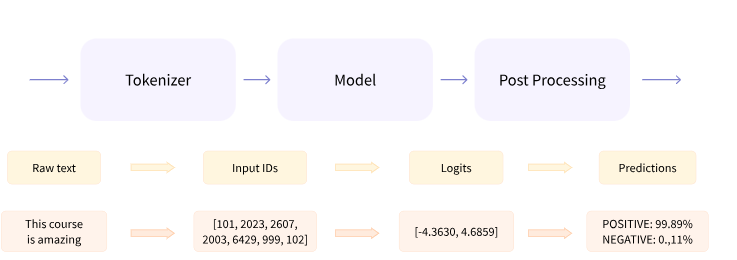

#  Tokenizers 

In [71]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
[x for x in dir( tokenizer ) if not x.startswith('_') ]

['SPECIAL_TOKENS_ATTRIBUTES',
 'add_special_tokens',
 'add_tokens',
 'added_tokens_decoder',
 'added_tokens_encoder',
 'additional_special_tokens',
 'additional_special_tokens_ids',
 'all_special_ids',
 'all_special_tokens',
 'all_special_tokens_extended',
 'apply_chat_template',
 'as_target_tokenizer',
 'backend_tokenizer',
 'batch_decode',
 'batch_encode_plus',
 'bos_token',
 'bos_token_id',
 'build_inputs_with_special_tokens',
 'can_save_slow_tokenizer',
 'chat_template',
 'clean_up_tokenization',
 'clean_up_tokenization_spaces',
 'cls_token',
 'cls_token_id',
 'convert_added_tokens',
 'convert_ids_to_tokens',
 'convert_tokens_to_ids',
 'convert_tokens_to_string',
 'create_token_type_ids_from_sequences',
 'decode',
 'decoder',
 'default_chat_template',
 'deprecation_warnings',
 'do_lower_case',
 'encode',
 'encode_plus',
 'eos_token',
 'eos_token_id',
 'from_pretrained',
 'get_added_vocab',
 'get_special_tokens_mask',
 'get_vocab',
 'init_inputs',
 'init_kwargs',
 'is_fast',
 'mask_

In [61]:
print( tokenizer.vocab_size )

print( tokenizer.all_special_tokens )

help( tokenizer.add_tokens)
len( tokenizer)

30522
['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
Help on method add_tokens in module transformers.tokenization_utils_base:

add_tokens(new_tokens: Union[str, tokenizers.AddedToken, List[Union[str, tokenizers.AddedToken]]], special_tokens: bool = False) -> int method of transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast instance
    Add a list of new tokens to the tokenizer class. If the new tokens are not in the vocabulary, they are added to
    it with indices starting from length of the current vocabulary and and will be isolated before the tokenization
    algorithm is applied. Added tokens and tokens from the vocabulary of the tokenization algorithm are therefore
    not treated in the same way.
    
    Note, when adding new tokens to the vocabulary, you should make sure to also resize the token embedding matrix
    of the model so that its embedding matrix matches the tokenizer.
    
    In order to do that, please use the [`~PreTrainedModel.r

30522

In [78]:
raw_inputs = [
    "home   I've been waiting for a HuggingFace course my whole life.",
    "home   I hate waiting so much!",
    "Note, when adding new tokens to the vocabulary, you should make sure to also resize the token embedding matrix"
]
model_inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
pprint(model_inputs)


{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]]),
 'input_ids': tensor([[  101,  2188,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
         12172,  2607,  2026,  2878,  2166,  1012,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  2188,  1045,  5223,  3403,  2061,  2172,   999,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  3602,  1010,  2043,  5815,  2047, 19204,  2015,  2000,  1996,
         16188,  1010,  2017,  2323,  2191,  2469,  2000,  2036, 24501,  4697,
          1996, 19204,  7861,  8270,  4667,  8185,   102]])}


In [82]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

outputs = model(**model_inputs)
print(outputs.last_hidden_state.shape)  #2 sentences. 17 words each and 768 features per word (embbedings)
print(model.config.id2label)

torch.Size([3, 27, 768])
{0: 'NEGATIVE', 1: 'POSITIVE'}


AutoModel.from_pretrained(checkpoint)

Returns only the model without its head.

This architecture contains only the base Transformer module: given some inputs, it outputs what we’ll call hidden states, also known as features. For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model.


While these hidden states can be useful on their own, they’re usually inputs to another part of the model, known as the head. In Chapter 1, the different tasks could have been performed with the same architecture, but each of these tasks will have a different head associated with it.

In [6]:
from transformers import pipeline
en_fr_translator = pipeline("translation_en_to_fr")
en_fr_translator("How old are you?")

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/workspaces/MLLearningRepo/env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[{'translation_text': ' quel âge êtes-vous?'}]

In [5]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-mul"
translator = pipeline("translation", model=model_checkpoint)
translator("How are you?")

[{'translation_text': '- Kakava?'}]

In [7]:
[i for i in dir(translator) if not i.startswith("_") ]


['binary_output',
 'call_count',
 'check_inputs',
 'check_model_type',
 'default_input_names',
 'device',
 'device_placement',
 'ensure_tensor_on_device',
 'feature_extractor',
 'forward',
 'framework',
 'get_inference_context',
 'get_iterator',
 'image_processor',
 'iterate',
 'model',
 'modelcard',
 'postprocess',
 'predict',
 'preprocess',
 'push_to_hub',
 'return_name',
 'run_multi',
 'run_single',
 'save_pretrained',
 'task',
 'tokenizer',
 'torch_dtype',
 'transform']

In [10]:
help(translator)


Help on TranslationPipeline in module transformers.pipelines.text2text_generation object:

class TranslationPipeline(Text2TextGenerationPipeline)
 |  TranslationPipeline(*args, **kwargs)
 |  
 |  Translates from one language to another.
 |  
 |  This translation pipeline can currently be loaded from [`pipeline`] using the following task identifier:
 |  `"translation_xx_to_yy"`.
 |  
 |  The models that this pipeline can use are models that have been fine-tuned on a translation task. See the
 |  up-to-date list of available models on [huggingface.co/models](https://huggingface.co/models?filter=translation).
 |  For a list of available parameters, see the [following
 |  documentation](https://huggingface.co/docs/transformers/en/main_classes/text_generation#transformers.generation.GenerationMixin.generate)
 |  
 |  Usage:
 |  
 |  ```python
 |  en_fr_translator = pipeline("translation_en_to_fr")
 |  en_fr_translator("How old are you?")
 |  ```
 |  Arguments:
 |      model ([`PreTrainedMod

In [ ]:
from transformers import MBart50TokenizerFast, MBartForConditionalGeneration

ckpt = 'Narrativa/mbart-large-50-finetuned-opus-en-pt-translation'

tokenizer = MBart50TokenizerFast.from_pretrained(ckpt)
model = MBartForConditionalGeneration.from_pretrained(ckpt)

tokenizer.src_lang = 'en_XX'

def translate(text):
    inputs = tokenizer(text, return_tensors='pt')
    input_ids = inputs.input_ids
    attention_mask = inputs.attention_mask
    output = model.generate(input_ids, attention_mask=attention_mask, forced_bos_token_id=tokenizer.lang_code_to_id['pt_XX'])
    return tokenizer.decode(output[0], skip_special_tokens=True)

#text = "How old are you?"
#translation = translate(text)
#print(f"text = {text}\ntranslation = {translation}")

: 

In [1]:
from transformers import pipeline 
translator = pipeline(
    model="Narrativa/mbart-large-50-finetuned-opus-en-pt-translation", 
    task="translation_en_to_pt" )


#translator("How old are you?", src_lang="en", tgt_lang="pt")


/workspaces/MLLearningRepo/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


KeyboardInterrupt: 

In [2]:
from transformers import MBart50TokenizerFast, MBartForConditionalGeneration

ckpt = 'Narrativa/mbart-large-50-finetuned-opus-en-pt-translation'

tokenizer = MBart50TokenizerFast.from_pretrained(ckpt)
model = MBartForConditionalGeneration.from_pretrained(ckpt)

#tokenizer.src_lang = 'en_XX'

def translate(text):
    inputs = tokenizer(text, return_tensors='pt')
    input_ids = inputs.input_ids
    attention_mask = inputs.attention_mask
    output = model.generate(input_ids, attention_mask=attention_mask, forced_bos_token_id=tokenizer.lang_code_to_id['pt_XX'])
    return tokenizer.decode(output[0], skip_special_tokens=True)

#text = "How old are you?"
#translation = translate(text)
#print(f"text = {text}\ntranslation = {translation}")

: 

In [3]:
from transformers import pipeline
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-tc-big-en-pt")
print(pipe(">>por<< Tom tried to stab me."))

# expected output: O Tom tentou esfaquear-me.


OSError: Helsinki-NLP/opus-mt-tc-big-pt-en is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [1]:
from transformers import MBart50TokenizerFast, MBartForConditionalGeneration

ckpt = 'Narrativa/mbart-large-50-finetuned-opus-pt-en-translation'

tokenizer = MBart50TokenizerFast.from_pretrained(ckpt)
#model = MBartForConditionalGeneration.from_pretrained(ckpt)#.to("cuda")

tokenizer.src_lang = 'pt_XX'

def translate(text):
    inputs = tokenizer(text, return_tensors='pt')
    input_ids = inputs.input_ids#.to('cuda')
    attention_mask = inputs.attention_mask#.to('cuda')
    output = model.generate(input_ids, attention_mask=attention_mask, forced_bos_token_id=tokenizer.lang_code_to_id['en_XX'])
    return tokenizer.decode(output[0], skip_special_tokens=True)
    
    
#translate('Tom tentou esfaquear-me')

/workspaces/MLLearningRepo/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = MBartForConditionalGeneration.from_pretrained(ckpt)#.to("cuda")


: 